### Import

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [58]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   str    
 1   datetime     3636 non-null   str    
 2   cash_type    3636 non-null   str    
 3   card         3547 non-null   str    
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   str    
dtypes: float64(1), str(5)
memory usage: 170.6 KB


In [59]:
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [60]:
df.isna().mean() * 100

date           0.000000
datetime       0.000000
cash_type      0.000000
card           2.447745
money          0.000000
coffee_name    0.000000
dtype: float64

In [61]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

In [62]:
df['cash_type'].value_counts()

cash_type
card    3547
cash      89
Name: count, dtype: int64

In [63]:
df.duplicated(subset=['card'], keep=False).value_counts()

True     2865
False     771
Name: count, dtype: int64

### Clear missing value

In [64]:
df_clean = df.dropna(subset=['card'])

In [65]:
df_clean.isna().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [66]:
df_final = df_clean[['datetime', 'cash_type', 'card', 'money', 'coffee_name']]

In [67]:
df_final.info()

<class 'pandas.DataFrame'>
Index: 3547 entries, 0 to 3635
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     3547 non-null   str    
 1   cash_type    3547 non-null   str    
 2   card         3547 non-null   str    
 3   money        3547 non-null   float64
 4   coffee_name  3547 non-null   str    
dtypes: float64(1), str(4)
memory usage: 166.3 KB


### Explore data

### Waktu,Penjualan & Segment

In [68]:
df_fc = df_final[['datetime','coffee_name','money']]
df_fc.head()

,datetime,coffee_name,money
0,2024-03-01 10:15:50.520,Latte,38.7
1,2024-03-01 12:19:22.539,Hot Chocolate,38.7
2,2024-03-01 12:20:18.089,Hot Chocolate,38.7
3,2024-03-01 13:46:33.006,Americano,28.9
4,2024-03-01 13:48:14.626,Latte,38.7


In [69]:
df_fc.dtypes

datetime           str
coffee_name        str
money          float64
dtype: object

In [70]:
df_fc['datetime'] = pd.to_datetime(df_fc['datetime'])
df_fc = df_fc.sort_values('datetime')

In [71]:
df_daily = (
    df_fc
    .groupby(df_fc['datetime'].dt.date)['money']
    .sum()
    .reset_index()
)


df_daily.columns = ['date', 'money']
df_daily.head()

,date,money
0,2024-03-01,396.3
1,2024-03-02,188.1
2,2024-03-03,309.1
3,2024-03-04,135.2
4,2024-03-05,338.5


In [72]:
df_daily['money'].describe()

count    381.000000
mean     294.607822
std      163.167893
min       23.020000
25%      172.420000
50%      272.360000
75%      380.620000
max      836.660000
Name: money, dtype: float64

<Axes: xlabel='date'>

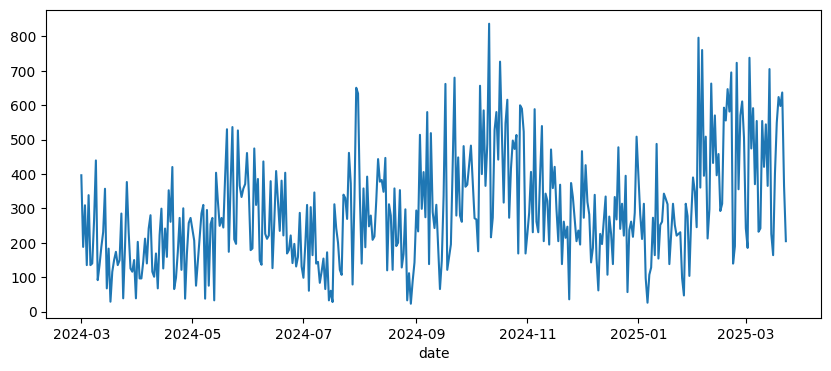

In [73]:
import matplotlib.pyplot as plt
df_daily.set_index('date')['money'].plot(figsize=(10,4))

In [74]:
df_segment = (
    df_fc
    .groupby([
        df_fc['datetime'].dt.date,
        'coffee_name'
    ])['money']
    .sum()
    .reset_index()
)

df_segment.columns = ['date', 'coffee_name', 'money']
df_segment.head(10)

,date,coffee_name,money
0,2024-03-01,Americano,28.9
1,2024-03-01,Americano with Milk,135.2
2,2024-03-01,Cocoa,38.7
3,2024-03-01,Hot Chocolate,116.1
4,2024-03-01,Latte,77.4
5,2024-03-02,Americano,86.7
6,2024-03-02,Americano with Milk,101.4
7,2024-03-03,Americano,28.9
8,2024-03-03,Americano with Milk,67.6
9,2024-03-03,Cocoa,38.7


In [75]:
top_products = (
    df_segment
    .groupby('coffee_name')['money']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top = df_segment[df_segment['coffee_name'].isin(top_products)]

In [76]:
products_ts = (
    df_top[df_top['coffee_name'] == top_products[0]]
    .set_index('date')['money']
)

In [77]:
products_ts.isna().sum()
products_ts.index.is_monotonic_increasing

True

In [78]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.sort_values('date')
df_daily = df_daily.set_index('date')

In [79]:
df_daily['lag_1'] = df_daily['money'].shift(1)
df_daily['lag_7'] = df_daily['money'].shift(7)
df_daily['lag_30'] = df_daily['money'].shift(30)

In [80]:
df_daily['rolling_mean_7'] = df_daily['money'].rolling(7).mean()
df_daily['rolling_mean_30'] = df_daily['money'].rolling(30).mean()

In [81]:
df_daily['weekday'] = df_daily.index.weekday
df_daily['month'] = df_daily.index.month
df_daily['day'] = df_daily.index.day


In [82]:
df_ml = df_daily.dropna()

In [83]:
train_size = int(len(df_ml) *0.7)

train = df_ml.iloc[:train_size]
test = df_ml.iloc[train_size:]

In [85]:
features = [
    'lag_1',
    'lag_7',
    'lag_30',
    'rolling_mean_7',
    'rolling_mean_30',
    'weekday',
    'month',
    'day'
]

x_train = train[features]
y_train = train['money']

x_test = test[features]
y_test = test['money']


In [86]:
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(x_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

pred = model.predict(x_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("MAE: ", mae)
print("RMSE: ", rmse)

MAE:  122.73943477414689
RMSE:  157.27966422522798


In [90]:
importance = pd.Series(model.feature_importances_, index=features)
print(importance.sort_values(ascending=False))

rolling_mean_7     0.346842
rolling_mean_30    0.114734
day                0.106855
weekday            0.096814
month              0.093488
lag_30             0.086388
lag_7              0.081449
lag_1              0.073431
dtype: float32


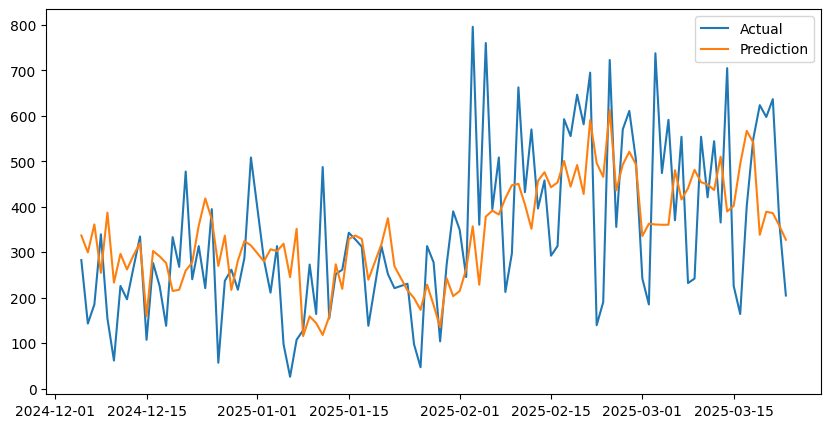

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, pred, label='Prediction')
plt.legend()
plt.show()

In [92]:
mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
print("MAPE: ", mape)

MAPE:  57.84172393528609
